In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re


In [3]:
path = '../data/raw/sales.csv'

df = pd.read_csv(path)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True).str.replace(r'[^a-z0-9_]', '', regex=True)
    return df


clean_columns(df=df)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5                    1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  


Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).
City: Location of supercenters
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
Gender: Gender of customer
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price: Price of each product in $
Quantity: Number of products purchased by customer
Tax: 5% tax fee for customer buying
Total: Total price including tax
Date: Date of purchase (Record available from January 2019 to March 2019)
Time: Purchase time (10am to 9pm)
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
COGS: Cost of goods sold
Gross margin percentage: Gross margin percentage
Gross income: Gross income
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross_income, dtype: float64


([<matplotlib.patches.Wedge at 0x115812f20>,
 [Text(0.5634291253611895, 0.9447473845926885, '5057.1605'),
  Text(-1.0990070828933396, 0.046727205675838095, '5057.032'),
  Text(0.5227885582833152, -0.9678285609177139, '5265.1765')])

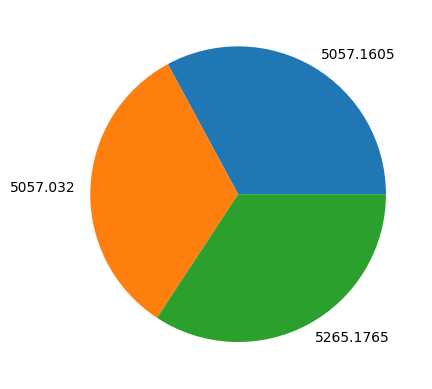

In [6]:
gross_income_per_branch = df.groupby('branch')['gross_income'].sum()
gross_income_per_productline = df.groupby('product_line')['gross_income'].sum()
gross_income_per_productline = df.groupby('gender')['gross_income'].sum()


print(gross_income_per_branch)

fig, ax = plt.subplots()
ax.pie(gross_income_per_branch, labels=gross_income_per_branch)


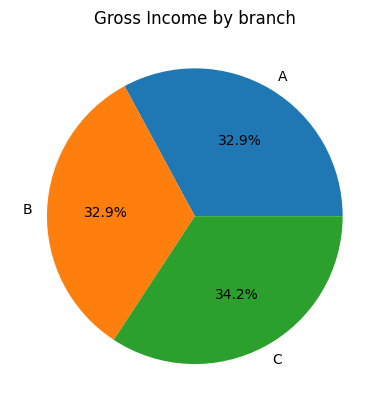


Gross Income by branch:
 branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross_income, dtype: float64


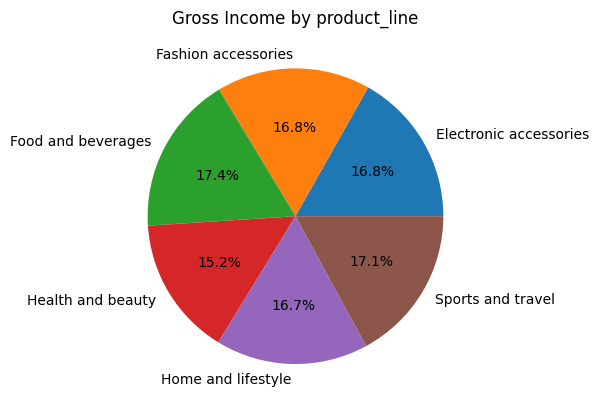


Gross Income by product_line:
 product_line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross_income, dtype: float64


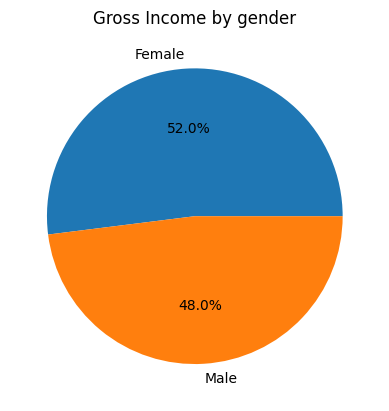


Gross Income by gender:
 gender
Female    7994.425
Male      7384.944
Name: gross_income, dtype: float64


In [8]:
import matplotlib.pyplot as plt

def plot_gross_income_by(df, group_col, income_col='gross_income', plot_type='pie'):
    # Group the data by the specified column
    grouped_data = df.groupby(group_col)[income_col].sum()
    
    # Create the plot
    fig, ax = plt.subplots()
    if plot_type == 'pie':
        ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
        ax.set_title(f'Gross Income by {group_col}')
    else:
        # For other types of plots (e.g., bar charts) you can use:
        grouped_data.plot(kind=plot_type, ax=ax, title=f'Gross Income by {group_col}')
    
    plt.show()
    return grouped_data

# Define the columns you want to analyze
columns_to_plot = ['branch', 'product_line', 'gender']

# Loop over each column, group the data, and plot
results = {}
for col in columns_to_plot:
    results[col] = plot_gross_income_by(df, col)
    print(f"\nGross Income by {col}:\n", results[col])


In [35]:
df.to_csv(path_or_buf="../data/processed/sales.csv")

In [40]:
## Convert to SQLITE

In [9]:
df.columns = df.columns.str.strip()
#clean_columns

In [10]:
connection = sqlite3.connect('../sales.db')

In [11]:
cursor = connection.cursor()


In [12]:
cursor.execute('''
SELECT branch, sum(gross_income) 
FROM sales
GROUP BY branch 
ORDER BY branch;
''')
connection.commit()

In [14]:
result = cursor.fetchall()

# Ausgabe der Ergebnisse in der Konsole
print(result)


[]


In [16]:
def read_sql_query(sql, db):
    conn = sqlite3.connect(db)
    cursor = connection.cursor()
    cursor.execute(sql)
    rows = cursor.fetchall()
    for row in rows:
        print(row)
    conn.close()

In [22]:
branch_query ='''
SELECT branch, sum(gross_income) 
FROM sales
GROUP BY branch 
ORDER BY branch;
'''
read_sql_query(branch_query, '../sales.db')

('A', 5057.1605)
('B', 5057.032)
('C', 5265.1765)
